## **Trabajo Práctico Individual n° 2: Aprendizaje Supervisado**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Martina
- Apellido: Crivaro
- Legajo: 1633302

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el aprendizaje automático supervisado.

Utilizaremos un dataset de airbnb donde buscaremos predecir el precio de las noches de cada hogar en funcion de algunas variables.

#### Variables:
- Unnamed: 0: Variable de contador de registros (no será utilizada en nuetro análisis)
- neighbourhood: Barrio donde se encuentra ubicado la casa.
- room_type: Tipo de hogar en alquiler.
- price: Precio por noche.
- minimum_nights: Cantidad minimas de noches que pueden alquilar el hogar.
- number_of_reviews: Cantidad de reviews
- reviews_per_month: Tasa de reviews que tienen por mes
- calculated_host_listings_count: Cantidad de hogares ofrecidos por el host.
- availability_365: Cantidad de dias que se encuentra en alquiler el hogar

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 13 de Octubre 2022 a las 23h59

In [7]:
## Importo librerías de maniupulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
## Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV # Hace una busqueda de una cantidad determinada de parametros en lugar de todas las combinaciones posibles

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset bajo en nombre "london"
- corroborar que lo hayamos cargado correctamente.

In [10]:
#Cargamos el dataset
london = pd.read_csv('TP2_airbnb_london.csv')

In [11]:
#Verificamos con .head() y el archivo que los datos se hayan cargado correctamente
london.head()

,Unnamed: 0,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,Haringey,Private room,35,1,131,1.71,4,262
1,1,Ealing,Private room,70,2,2,0.07,6,62
2,2,Islington,Private room,45,1,14,0.14,2,364
3,5,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295
4,6,Barnet,Private room,29,5,114,1.13,3,285


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset y eliminar la variable "Unnamed:0" del dataset.
Volver a guardar el dataset sin esta variable bajo el nombre "london"

In [14]:
# Definimos columnas y filas del dataset con np.shape() y luego las diferenciamos del doc.shape
print(f'Dimensiones => {np.shape(london)}')
Filas = np.shape(london)[0]
Columnas = np.shape(london)[1]
print(f'Cant. de Filas: {Filas}')
print(f'Cant. de Columnas: {Columnas}')

Dimensiones => (51827, 9)
Cant. de Filas: 51827
Cant. de Columnas: 9


In [16]:
# Eliminamos la columna "Unnamed: 0"
london = london.drop(columns=["Unnamed: 0"])

In [21]:
# Guardamos el dataset modificado bajo el nombre "london"
london.to_csv("london.csv", index=False)

In [23]:
# Verificamos nuevamente las dimensiones del dataset y visualizamos para comprobar que se haya eliminado la columna
print(f'Dimensiones => {np.shape(london)}')
london.head()

Dimensiones => (51827, 8)


,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Haringey,Private room,35,1,131,1.71,4,262
1,Ealing,Private room,70,2,2,0.07,6,62
2,Islington,Private room,45,1,14,0.14,2,364
3,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295
4,Barnet,Private room,29,5,114,1.13,3,285


##### **Objetivo 3**
Corroborar que el dataset no cuenta con valores nulos, si los hubiera llenarlos todos con 0.

In [26]:
# Cantidad de valores nulos ordenados descendentemente
total_NaN = london.isnull().sum().sort_values(ascending=False)
# Columnas que tienen al menos un NaN
col_NaN = london.isnull().any()
# Mostramos los resultados
missing_data = pd.concat([col_NaN, total_NaN], axis=1, keys=['Valores Nulos', 'Total'])
missing_data.head(8)

,Valores Nulos,Total
neighbourhood,False,0
room_type,False,0
price,False,0
minimum_nights,False,0
number_of_reviews,False,0
reviews_per_month,False,0
calculated_host_listings_count,False,0
availability_365,False,0


In [28]:
# Al no haber valores nulos no será necesario proceder con el reemplazo de NaN por "0"

##### **Objetivo 4**
Mostrar el tipo de dato para las variables "neighbourhood" y "room_type".

In [31]:
# Mostramos el tipo de dato de las columnas 'neighbourhood' y 'room_type'
data_types = london[['neighbourhood', 'room_type']].dtypes

# Lo visualizamos en un cuadro
type_data = pd.concat([data_types], axis=1, keys=['Tipo de Dato'])
print(type_data)

              Tipo de Dato
neighbourhood       object
room_type           object


##### **Objetivo 5**
Generar las variables dummies para estas dos variables categóricas y unirlas al dataset london.


In [34]:
## Genero las dummies para la variable neighbourhood, dentro de la variable neigh_dummies.
neigh_dummies = pd.get_dummies(london['neighbourhood'], prefix='neigh')

Imprimir las dimensiones y primeras lineas de estas dummies

In [37]:
neigh_dummies.head()


,neigh_Barking and Dagenham,neigh_Barnet,neigh_Bexley,neigh_Brent,neigh_Bromley,neigh_Camden,neigh_City of London,neigh_Croydon,neigh_Ealing,neigh_Enfield,...,neigh_Merton,neigh_Newham,neigh_Redbridge,neigh_Richmond upon Thames,neigh_Southwark,neigh_Sutton,neigh_Tower Hamlets,neigh_Waltham Forest,neigh_Wandsworth,neigh_Westminster
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
print(f'Dimensiones => {np.shape(neigh_dummies)}')

Dimensiones => (51827, 33)


In [41]:
## Genero las dummies para la variable room_type, dentro de la variable room_dummies.
room_dummies = pd.get_dummies(london['room_type'], prefix='room')

Imprimir las dimensiones y primeras lineas de estas dummies

In [44]:
room_dummies.head()

,room_Entire home/apt,room_Private room,room_Shared room
0,False,True,False
1,False,True,False
2,False,True,False
3,True,False,False
4,False,True,False


In [46]:
print(f'Dimensiones => {np.shape(room_dummies)}')

Dimensiones => (51827, 3)


Joinear las variables dummies al dataset



In [49]:
# Para poder utilizar la funcion join, la información debe provenir de 1 solo dataset, con lo cual debemos concatenar los dummies de ambas variables
# en un solo dataset y ahora si, podemos joinear nuestro dataset de london con las dummies
dummies = pd.concat([neigh_dummies, room_dummies], axis=1)
london = london.join(dummies)
london.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neigh_Barking and Dagenham,neigh_Barnet,...,neigh_Richmond upon Thames,neigh_Southwark,neigh_Sutton,neigh_Tower Hamlets,neigh_Waltham Forest,neigh_Wandsworth,neigh_Westminster,room_Entire home/apt,room_Private room,room_Shared room
0,Haringey,Private room,35,1,131,1.71,4,262,False,False,...,False,False,False,False,False,False,False,False,True,False
1,Ealing,Private room,70,2,2,0.07,6,62,False,False,...,False,False,False,False,False,False,False,False,True,False
2,Islington,Private room,45,1,14,0.14,2,364,False,False,...,False,False,False,False,False,False,False,False,True,False
3,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295,False,False,...,False,False,False,True,False,False,False,True,False,False
4,Barnet,Private room,29,5,114,1.13,3,285,False,True,...,False,False,False,False,False,False,False,False,True,False


In [51]:
# Emprolijaremos el archivo cambiando los valores True y False por booleans y eliminaremos las columnas de neighborhood
# y room_type ahora que generamos las dummies, para liberar el dataset de información información innecesaria
london[dummies.columns] = london[dummies.columns].astype(int)
#london = london.drop(['neighbourhood', 'room_type'], axis=1)
# Al avanzar notamos que estas columnas son necesarias para definir x e y, con lo cual dejamos el codigo como comentario y continuamos
london.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neigh_Barking and Dagenham,neigh_Barnet,...,neigh_Richmond upon Thames,neigh_Southwark,neigh_Sutton,neigh_Tower Hamlets,neigh_Waltham Forest,neigh_Wandsworth,neigh_Westminster,room_Entire home/apt,room_Private room,room_Shared room
0,Haringey,Private room,35,1,131,1.71,4,262,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Ealing,Private room,70,2,2,0.07,6,62,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Islington,Private room,45,1,14,0.14,2,364,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295,0,0,...,0,0,0,1,0,0,0,1,0,0
4,Barnet,Private room,29,5,114,1.13,3,285,0,1,...,0,0,0,0,0,0,0,0,1,0


##### Dividiremos nuestro dataset en la variable dependiente "y" (label o etiqueta) y las variables independientes "x"

In [54]:

y = np.array(london[["price"]])
x = london.drop(['price', 'neighbourhood','room_type'], axis=1)

##### **Objetivo 7**

Dividir el dataset entre Train y Test, tomar un test_size del 30%.

In [57]:
# obtenemos xtrain, xtest, ytrain e ytest :

xtrain, xtest, ytrain, ytest = train_test_split(x.values, y, test_size=0.30)

# observamos como queda la matriz de xtrain y xtest
print("Matriz XTrain: ")
print(xtrain.shape)
print("Matriz XTest: ")
print(xtest.shape)

Matriz XTrain: 
(36278, 41)
Matriz XTest: 
(15549, 41)


##### **Objetivo 8**
Con el StandardScaler generado en la linea siguiente, realizar el transform para el xtrain y xtest guardandolos en nuevas variables llamadas "xtrain_scal" y "xtest_scal".


In [60]:
scaler = preprocessing.StandardScaler().fit(xtrain)

In [62]:
xtrain_scal = scaler.transform(xtrain)  

In [64]:
xtest_scal = scaler.transform(xtest)  

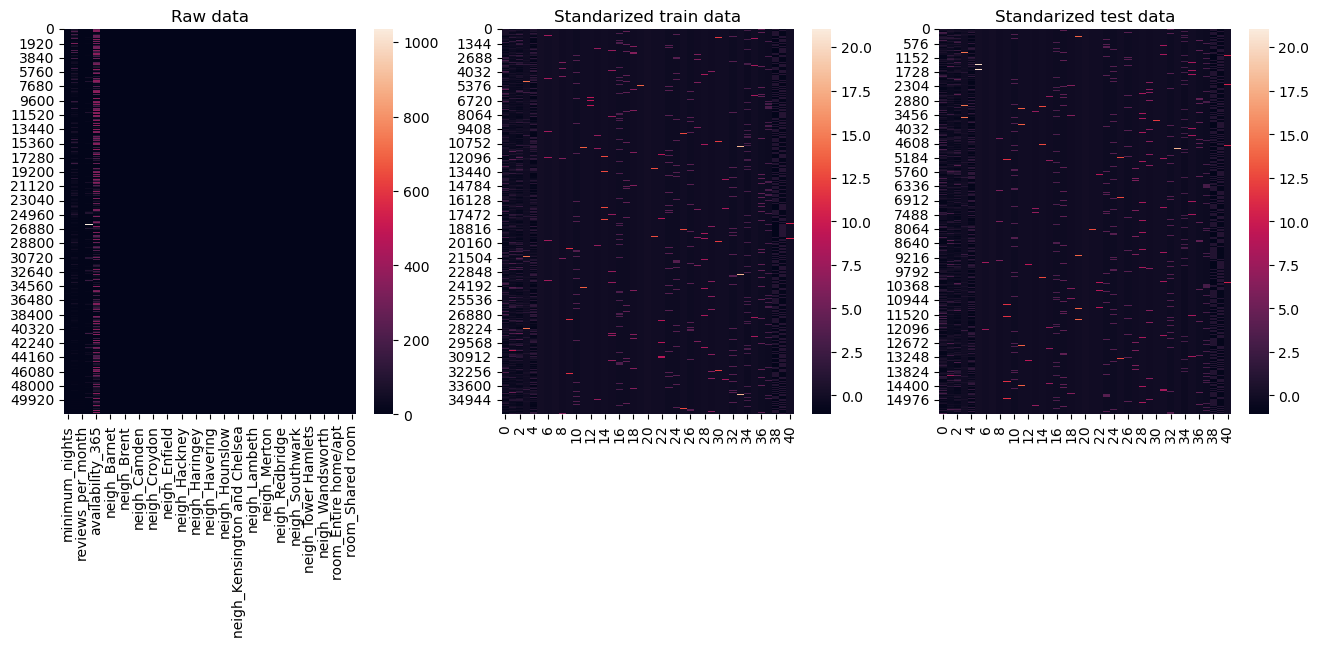

In [66]:
# visualizamos como queda el dataset pre y post scaling tanto en train como en test
fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.heatmap(x, ax = axs[0])
sns.heatmap(xtrain_scal, ax = axs[1])
sns.heatmap(xtest_scal, ax = axs[2])
axs[0].set_title('Raw data')
axs[1].set_title('Standarized train data')
axs[2].set_title('Standarized test data')
plt.show()

In [ ]:
# Como podemos observar, los valores se escalaron correctamente, obteniendo valores mejor balanceados, y compatibles entre si. Es claro que este paso
# era completamente necesario para poder avanzar con el estudio. 

##### **Objetivo 9**
Definir un modelo de regresion lineal standard y entrenarlo para nuestro dataset (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Obtener las predicciones y el "mean_squared_error" para el test set.

In [68]:
# Definimos modelo Linear Regression llamado Model_LiRe y lo entreno
Model_LiRe = LinearRegression().fit(xtrain_scal, ytrain)

In [70]:
# Obtenemos coeficiente de determinación (R^2), de regresión y la intersección del modelo de testeo:
print(f'Coef. de Determinación => {Model_LiRe.score(xtest_scal, ytest)}')
print(f'Coef. de Regresión => {Model_LiRe.coef_}')
print(f'Intersección => {Model_LiRe.intercept_}')

Coef. de Determinación => 0.5033179036830013
Coef. de Regresión => [[ 9.35161974e-01 -5.93752126e-01 -2.37289313e+00  5.77880569e+00
   6.62976237e+00 -1.39900029e+12 -3.56010673e+12 -1.33552331e+12
  -4.60656410e+12 -2.44361123e+12 -7.28474775e+12 -2.06674385e+12
  -3.03304485e+12 -3.94631471e+12 -2.22246185e+12 -3.88481865e+12
  -7.69482829e+12 -6.24954815e+12 -4.42132069e+12 -2.04048894e+12
  -1.33552331e+12 -2.18336536e+12 -3.11607391e+12 -6.80129750e+12
  -6.90683195e+12 -2.21761344e+12 -6.74346493e+12 -4.69284870e+12
  -3.46698400e+12 -4.30012397e+12 -2.34491488e+12 -3.47914923e+12
  -6.93835501e+12 -1.56017569e+12 -8.58987640e+12 -3.50033003e+12
  -6.16445629e+12 -8.42668246e+12 -4.49294922e+13 -4.48529014e+13
  -8.62433946e+12]]
Intersección => [86.88865122]


In [71]:
# Obtenemos Predicciones de mi modelo de Testeo:
ypred = Model_LiRe.predict(xtest_scal)
print(f'Predicciones del modelo de Testeo: {ypred}')

Predicciones del modelo de Testeo: [[141.39646372]
 [139.02927622]
 [136.50583872]
 ...
 [108.54490122]
 [ 45.32615122]
 [ 73.45908579]]


In [72]:
# Calculamos el Mean Squared Error (MSE)
mse = np.sqrt(mean_squared_error(ytest, ypred))
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 39.58595390069247


In [105]:
# Para entender que significa este error debo analizar mis valores maximo y minimo de precio:
precio_minimo = london['price'].min()
precio_maximo = london['price'].max()
print(f"Valor mínimo de precio: {precio_minimo}")
print(f"Valor máximo de precio: {precio_maximo}")

Valor mínimo de precio: 0
Valor máximo de precio: 299


In [ ]:
# Con un precio maximo de 299, un MSE de 39 me indica que el modelo no ajusta muy bien, debería mejorarse

##### **Objetivo 10**
Definir un modelo de regresion SVM Regressor (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) e implementar GridSearch para realizar la búsqueda de hiperparámetros.

Asignar dos posibles valores para el parámetro "kernel", y tres posibles valores para "C" y "gamma".

Setear al parámetro "refit" en True y hacer 5 CrossValidation.

In [206]:
# Para poder correr el SVR necesitamos tomar una base de datos menor, por lo tanto crearemos un xtrain y xtest pero esta vez de menor magnitud:
# Tomamos una muestra aleatoria del 10% del dataset original para achicar el tamaño total
sample_data = london.sample(frac=0.1, random_state=42)

# Separamos la muestra en X e y
y_sample = np.array(sample_data[["price"]])
x_sample = sample_data.drop(['price', 'neighbourhood', 'room_type'], axis=1)

# Dividimos en train y test usando el dataset reducido
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x_sample.values, y_sample, test_size=0.2, random_state=42)

# Observamos las dimensiones
print("Matriz XTrain reducida: ")
print(xtrain1.shape)
print("Matriz XTest reducida: ")
print(xtest1.shape)

Matriz XTrain reducida: 
(4146, 41)
Matriz XTest reducida: 
(1037, 41)


In [208]:
scaler1 = preprocessing.StandardScaler().fit(xtrain1)
xtrain_scal1 = scaler1.transform(xtrain1)
xtest_scal1 = scaler1.transform(xtest1)

In [210]:
svreg = SVR()

In [212]:
param_svreg = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10], 'gamma':[ 0.05, 0.1, 1]}

In [214]:
# Implementamos GridSearchCV con 5-fold cross-validation y refit=True
# Para facilitar el procesamiento se decidió hacer un 3-fold cross-validation en su lugar
grid_search = GridSearchCV(estimator=svreg, param_grid=param_svreg, cv=3, refit=True, verbose=1, n_jobs=2)           

# Entrenamos el modelo en el conjunto de entrenamiento escalado
grid_search.fit(xtrain_scal1, ytrain1.ravel())

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=2,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.05, 0.1, 1],
                         'kernel': ('linear', 'rbf')},
             verbose=1)

##### **Objetivo 11**

Mostrar cuales fueron los mejores hiperparámetros y para estos obtener el mean_squared_error en el test set del punto anterior

In [217]:
# Imprimimos los mejores parámetros obtenidos
print(f"Mejores parámetros: {grid_search.best_params_}")

Mejores parámetros: {'C': 10, 'gamma': 0.05, 'kernel': 'linear'}


In [219]:
# Utilizamos el mejor estimador para realizar predicciones en el conjunto de prueba
ypred_svr = grid_search.best_estimator_.predict(xtest_scal1)
print(f'Predicciones del modelo de Testeo Grid Search: {ypred_svr}')

Predicciones del modelo de Testeo Grid Search: [121.98446409  99.82757438 100.4993783  ...  82.22846799  40.01688454
  38.61961995]


In [221]:
# Calculamos el Mean Squared Error (MSE) para las predicciones
mse_svr = np.sqrt(mean_squared_error(ytest1, ypred_svr))
print(f"Mean Squared Error (MSE) para SVR: {mse_svr}")

Mean Squared Error (MSE) para SVR: 40.694259581681315


In [223]:
# Nuevamente, con un precio maximo de 299, un MSE de 40 me indica que el modelo no ajusta muy bien, debería mejorarse

##### **Objetivo 12**
Repetir el objetivo 10 pero ahora seteando nuevos valores para los hiperparámetros mencionados con el objetivo de mejorar las predicciones.

Cuales son los mejores hiperparámetros ahora?
Obtenemos una mejora en las predicciones?
Mostrar los resultados.

In [255]:
# Definimos un nuevo modelo de SVR
svreg_new = SVR()
# Definimos los nuevos hiperparámetros
new_param_svreg = {   'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 50, 100],  'gamma': [0.01, 0.05, 0.1] }
# Implementamos GridSearchCV con los nuevos hiperparámetros
grid_search_new = GridSearchCV(estimator=svreg_new, param_grid=new_param_svreg,  cv=5,  refit=True,  verbose=1,  n_jobs=2)           
# Entrenamos el modelo en el conjunto de entrenamiento escalado
grid_search_new.fit(xtrain_scal1, ytrain1.ravel())

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=2,
             param_grid={'C': [10, 50, 100], 'gamma': [0.01, 0.05, 0.1],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [259]:
# Imprimimos los mejores hiperparámetros obtenidos
print(f"Mejores parámetros ahora: {grid_search_new.best_params_}")

Mejores parámetros ahora: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [261]:
# Usamos el mejor modelo para hacer predicciones en el conjunto de prueba
ypred_svr_new = grid_search_new.best_estimator_.predict(xtest_scal1)
print(f'Predicciones del modelo de Testeo Grid Search Mejorado: {ypred_svr_new}')

Predicciones del modelo de Testeo Grid Search Mejorado: [131.055837    95.78863988 101.33280636 ...  67.32865027  47.93437218
  42.11002475]


In [263]:
# Calculamos el Mean Squared Error (MSE) para las predicciones
mse_svr_new = np.sqrt(mean_squared_error(ytest1, ypred_svr_new))
print(f"Mean Squared Error (MSE) para el nuevo modelo SVR: {mse_svr_new}")

Mean Squared Error (MSE) para el nuevo modelo SVR: 39.85745315603315


In [253]:
# Después de probar con nuevos valores para los hiperparámetros (como aumentar C, gamma y agregar el kernel 'poly'),
# el Mean Squared Error (MSE) apenas se redujo, con lo cual, se debería seguir intentando hasta lograr un MSE menor para asegurarnos de que las
# interpretaciones sean significativas. 

In [282]:
# Probamos nuevamente tomando ahora una muestra aleatoria mayor, del 50% del dataset original
sample_data1 = london.sample(frac=0.5, random_state=42)

# Separamos la muestra en X e y
y_sample1 = np.array(sample_data[["price"]])
x_sample1 = sample_data.drop(['price', 'neighbourhood', 'room_type'], axis=1)

# Dividimos en train y test usando el dataset reducido
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x_sample1.values, y_sample1, test_size=0.35, random_state=42)

# Observamos las dimensiones
print("Matriz XTrain reducida: ")
print(xtrain2.shape)
print("Matriz XTest reducida: ")
print(xtest2.shape)

Matriz XTrain reducida: 
(3368, 41)
Matriz XTest reducida: 
(1815, 41)


In [284]:
scaler2 = preprocessing.StandardScaler().fit(xtrain2)
xtrain_scal2 = scaler2.transform(xtrain2)
xtest_scal2 = scaler2.transform(xtest2)
# Definimos un nuevo modelo de SVR
svreg_new2 = SVR()
# Definimos los nuevos hiperparámetros
new_param_svreg2 = {   'kernel': ['linear', 'rbf', 'poly'], 'C': [50, 100, 500],  'gamma': [0.001, 0.01, 0.015] }
# Implementamos GridSearchCV con los nuevos hiperparámetros
grid_search_new2 = GridSearchCV(estimator=svreg_new2, param_grid=new_param_svreg2,  cv=5,  refit=True,  verbose=1,  n_jobs=2)           
# Entrenamos el modelo en el conjunto de entrenamiento escalado
grid_search_new2.fit(xtrain_scal2, ytrain2.ravel())

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=2,
             param_grid={'C': [50, 100, 500], 'gamma': [0.001, 0.01, 0.015],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [285]:
# Imprimimos los mejores hiperparámetros obtenidos
print(f"Mejores parámetros ahora: {grid_search_new2.best_params_}")
# Usamos el mejor modelo para hacer predicciones en el conjunto de prueba
ypred_svr_new2 = grid_search_new.best_estimator_.predict(xtest_scal2)
print(f'Predicciones del modelo de Testeo Grid Search Mejorado: {ypred_svr_new2}')
# Calculamos el Mean Squared Error (MSE) para las predicciones
mse_svr_new2 = np.sqrt(mean_squared_error(ytest2, ypred_svr_new2))
print(f"Mean Squared Error (MSE) para el nuevo modelo SVR: {mse_svr_new2}")

Mejores parámetros ahora: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Predicciones del modelo de Testeo Grid Search Mejorado: [131.10849868  96.44764836 102.06637102 ...  99.3109031   64.82248583
  43.12879533]
Mean Squared Error (MSE) para el nuevo modelo SVR: 39.925042341819314


In [ ]:
# Finalmente, luego de aumentar la muestra, tomar los mejores parametros sugeridos, y correr nuevamente el modelo, notamos que
# el MSE sigue sin bajar de 39, con lo cual podemos asumir que el modelo utilizado no es el ideal para el caso. En esta situacion la decisión que 
# yo tomaría sería probar con nuevos metodos que me permitan obetener resultados más significativos